In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('C:/Users/User/Downloads/Online Sales Data.csv', parse_dates=['Date'])

In [9]:
#Order ID: уникальный идентификатор для каждого заказа на продажу.
#Date:  Дата сделки купли-продажи.
#Category:категория продаваемого товара (например, электроника, бытовая техника, одежда, книги, косметические товары, спорт).
#Product Name: конкретное название или модель продаваемого продукта.
#Quantity:количество единиц продукта, проданного в транзакции.
#Unit Price:Цена одной единицы продукта
#Total Price: общий доход, полученный от транзакции продажи (количество * цена за единицу).
#Region: географический регион
#Payment Method: способ оплаты


In [10]:
# задачи
#1. Анализируйте тенденции продаж с течением времени, чтобы выявить сезонные закономерности или возможности роста.
#2. Изучите популярность различных категорий товаров в разных регионах.
#3. Изучите влияние способов оплаты на объем продаж или выручку.
#4. Определите самые продаваемые продукты в каждой категории, чтобы оптимизировать запасы и маркетинговые стратегии.
#5. Оцените эффективность конкретных продуктов или категорий в разных регионах, 
#   чтобы соответствующим образом адаптировать маркетинговые кампании.

In [11]:
#ПРЕДОБРАБОТКА ДАННЫХ

In [12]:
# проверяем датафрейм на качество данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 17.0+ KB


In [13]:
# заменим пробелы в названии колонок на нижнее подчеркивание

# получаем список с названием колонок
col =list(df.columns)

In [14]:
col

['Transaction ID',
 'Date',
 'Product Category',
 'Product Name',
 'Units Sold',
 'Unit Price',
 'Total Revenue',
 'Region',
 'Payment Method']

In [15]:
# с помощью лямба фунции получаем список где пробел заменен на нижнее подчеркивание
result = list(map(lambda x: x.replace(' ', '_'), col))

In [16]:
result

['Transaction_ID',
 'Date',
 'Product_Category',
 'Product_Name',
 'Units_Sold',
 'Unit_Price',
 'Total_Revenue',
 'Region',
 'Payment_Method']

In [17]:
# с помощью метода rename переименовываем название колонок
df.rename(columns=dict(zip(col,result)), inplace=True)

In [18]:
df.head()

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [19]:
df.describe()

,Transaction_ID,Units_Sold,Unit_Price,Total_Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [20]:
df['Product_Name'].value_counts()

Dyson Supersonic Hair Dryer                         2
The Girl with the Dragon Tattoo by Stieg Larsson    2
Keurig K-Elite Coffee Maker                         2
The Silent Patient by Alex Michaelides              2
Dune by Frank Herbert                               2
                                                   ..
LG OLED TV                                          1
Uniqlo Ultra Light Down Jacket                      1
Sunday Riley Good Genes                             1
On Running Cloud Shoes                              1
Yeti Rambler 20 oz Tumbler                          1
Name: Product_Name, Length: 232, dtype: int64

In [21]:
df['Product_Name'].nunique()

232

In [22]:
# для решения 1 задания:Анализируйте тенденции продаж с течением времени, чтобы выявить сезонные закономерности или возможности роста.
# сгруппируем продажи по месяцам и категории продукта

In [23]:
# для этого создаем столбец с годом и месяцем

In [24]:
df['month'] =  df['Date'].dt.month

In [25]:
df.head(5)

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method,month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1


In [26]:
df_1= df.groupby(['month', 'Product_Category']).sum('Total_Revenue').reset_index()

In [27]:
df_1.drop(columns=['Transaction_ID', 'Unit_Price'], inplace= True)

In [28]:
df_1.head()

,month,Product_Category,Units_Sold,Total_Revenue
0,1,Beauty Products,5,699.95
1,1,Books,14,308.86
2,1,Clothing,16,1789.84
3,1,Electronics,10,7999.90
4,1,Home Appliances,6,2169.94


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   month             48 non-null     int64  
 1   Product_Category  48 non-null     object 
 2   Units_Sold        48 non-null     int64  
 3   Total_Revenue     48 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


In [30]:
df_1['month'].nunique()

8

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

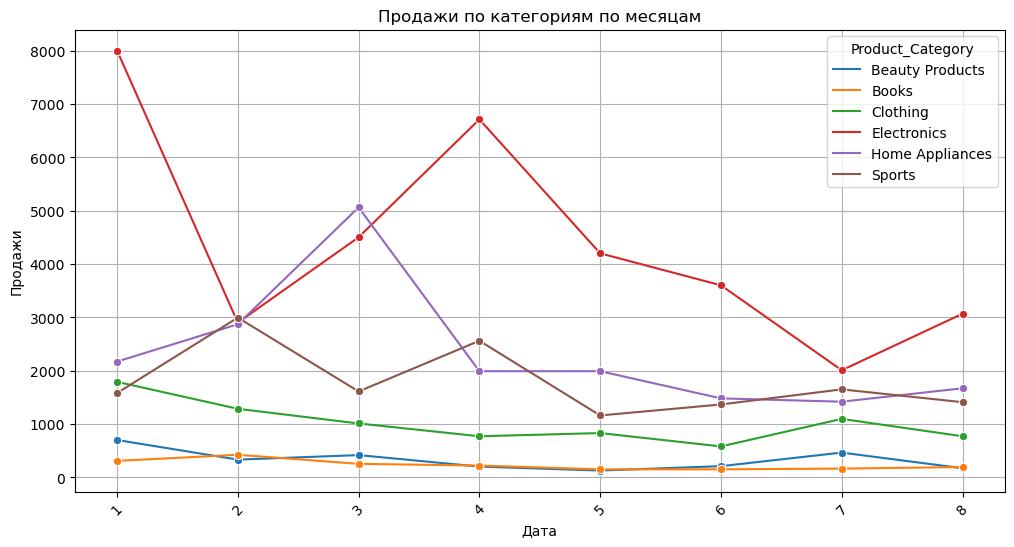

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_1, x='month', y='Total_Revenue', hue='Product_Category', marker='o')
plt.title('Продажи по категориям по месяцам')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

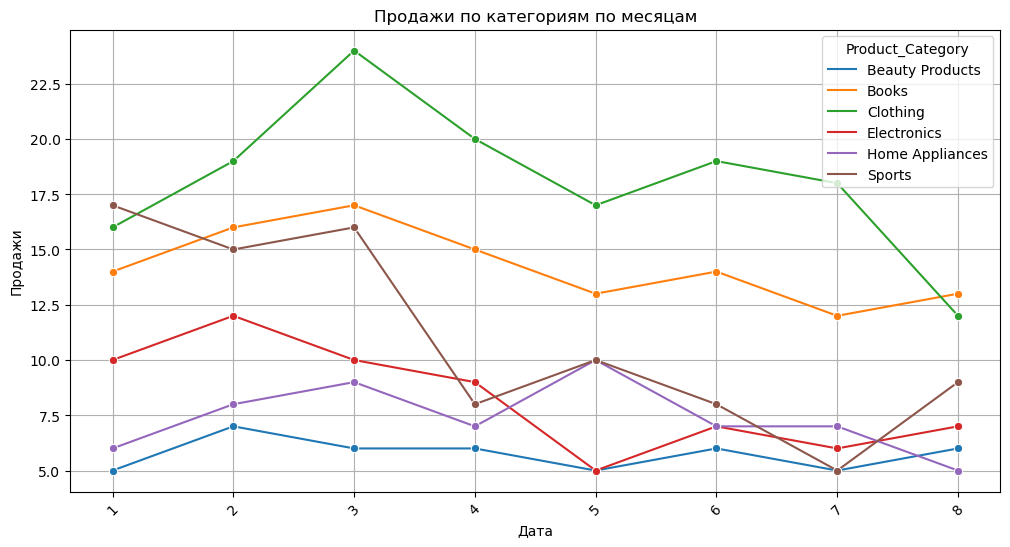

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_1, x='month', y='Units_Sold', hue='Product_Category', marker='o')
plt.title('Продажи по категориям по месяцам')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [34]:
df['Product_Category'].unique()

array(['Electronics', 'Home Appliances', 'Clothing', 'Books',
       'Beauty Products', 'Sports'], dtype=object)

In [35]:
df_clothing = df_1[df_1['Product_Category'] == 'Clothing']

In [36]:
df_clothing.head()

,month,Product_Category,Units_Sold,Total_Revenue
2,1,Clothing,16,1789.84
8,2,Clothing,19,1284.81
14,3,Clothing,24,1009.76
20,4,Clothing,20,769.80
26,5,Clothing,17,829.88


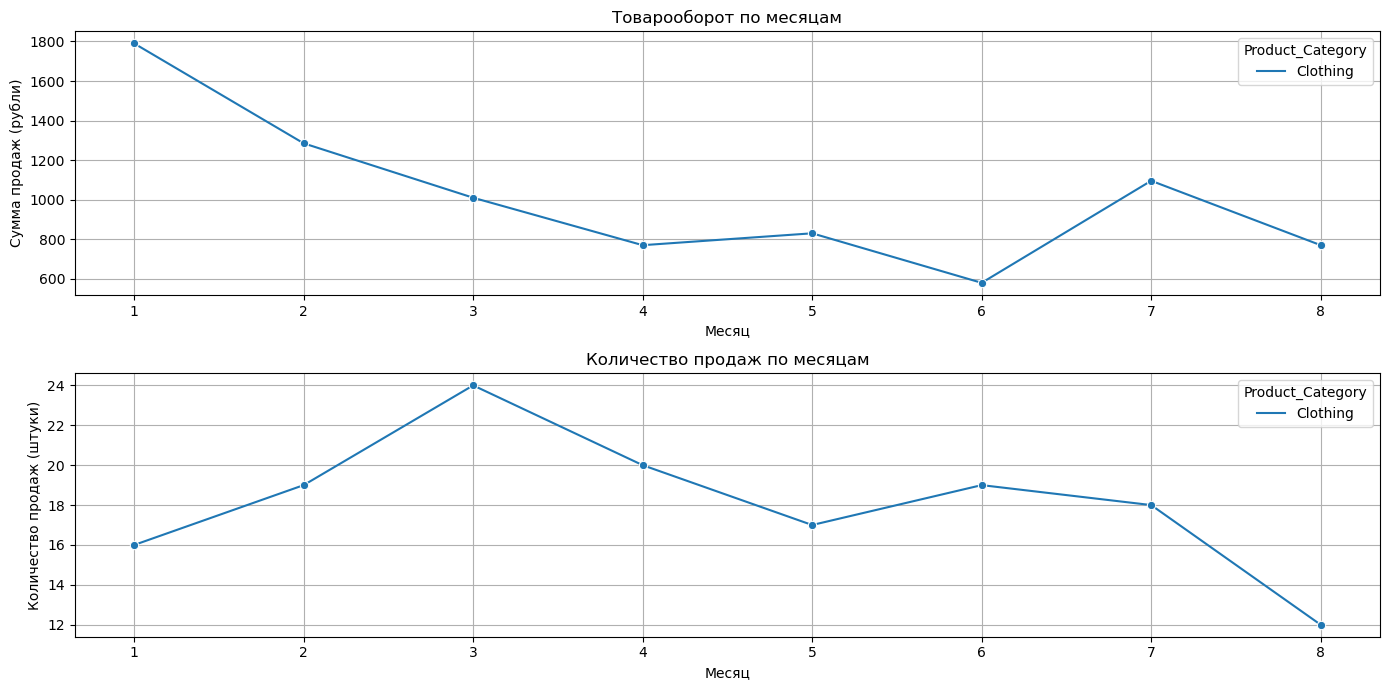

In [37]:
plt.figure(figsize=(14, 7))

# График для суммы продаж
plt.subplot(2, 1, 1)
sns.lineplot(data=df_clothing, x='month', y='Total_Revenue', hue='Product_Category', marker='o')
plt.title('Товарооборот по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж (рубли)')
plt.grid(True)

# График для количества продаж
plt.subplot(2, 1, 2)
sns.lineplot(data=df_clothing, x='month', y='Units_Sold', hue='Product_Category', marker='o')
plt.title('Количество продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество продаж (штуки)')
plt.grid(True)

# Настройка и показ графиков
plt.tight_layout()
plt.show()

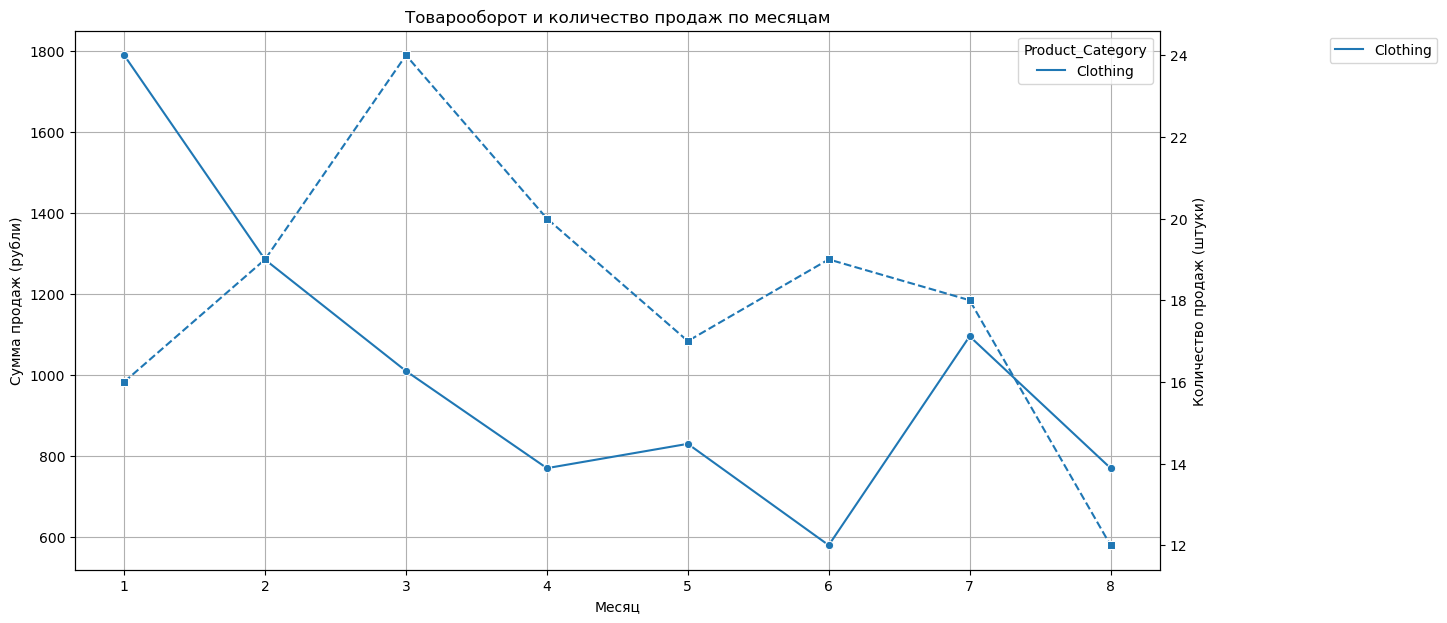

In [38]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# График для суммы продаж
sns.lineplot(data=df_clothing, x='month', y='Total_Revenue', hue='Product_Category', marker='o', ax=ax1)
ax1.set_title('Товарооборот и количество продаж по месяцам')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Сумма продаж (рубли)')
ax1.grid(True)

# Создание второй оси, которая делит ось X с первым графиком
ax2 = ax1.twinx()
sns.lineplot(data=df_clothing, x='month', y='Units_Sold', hue='Product_Category', marker='s', linestyle='--', ax=ax2)
ax2.set_ylabel('Количество продаж (штуки)')

# Настройка легенды для второй оси
ax2.legend(loc='upper left', bbox_to_anchor=(1.15, 1))

# Показ графиков
plt.show()

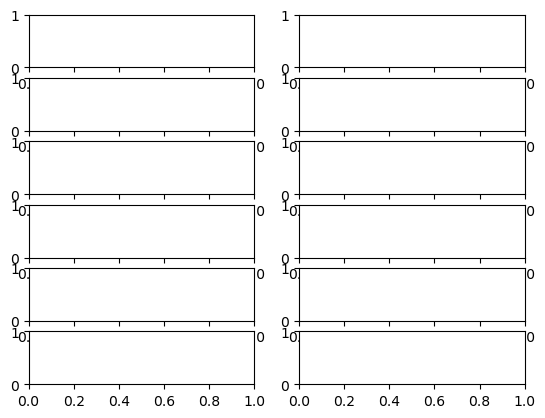

In [39]:
fig, axes = plt.subplots(nrows= 6, ncols=2)

In [40]:
#2. Изучим популярность различных категорий товаров в разных регионах.
# для этого сгруппируем данные по сумме продаж каждого продукта по регионам
# с помощью метода idxmax() получим индекс максимального значения по сумме продаж, далее с помощью функции .loc[] 
#выберем нужные строки по возвращенному индексу

In [41]:
df_product=df.groupby(['Region', 'Product_Category']).sum('Total_Revenue').reset_index()

In [42]:
df_product.loc[df_product.groupby('Region')['Total_Revenue'].idxmax()]

,Region,Product_Category,Transaction_ID,Units_Sold,Unit_Price,Total_Revenue,month
1,Asia,Sports,404920,88,10451.36,14326.52,180
3,Europe,Home Appliances,404760,59,12807.42,18646.16,177
5,North America,Electronics,404720,66,27663.66,34982.41,174


In [43]:
# в регионе Азии популярна категория Sports, в Европе Home Appliances, в СА Electronics

In [44]:
#3. Изучите влияние способов оплаты на объем продаж или выручку.
# для этого рассмотрим данные по распределению долей объема продаж по способу оплаты, глобально и в разрезе региона
# 

In [45]:
df_pay = df.groupby(['Payment_Method']).sum('Total_Revenue').reset_index().sort_values('Total_Revenue', ascending=False)

In [46]:
df_pay = df_pay[['Payment_Method', 'Total_Revenue']]

In [47]:
total_pay = df_pay['Total_Revenue'].sum()

In [48]:
total_pay

80567.85

In [49]:
df_pay['share'] = (df_pay['Total_Revenue']/total_pay*100).round(2)

In [50]:
df_pay

,Payment_Method,Total_Revenue,share
0,Credit Card,51170.86,63.51
2,PayPal,21268.06,26.40
1,Debit Card,8128.93,10.09


In [51]:
df_pay_reg = df.groupby(['Region', 'Payment_Method']).sum('Total_Revenue').reset_index()

In [52]:
df_pay_reg_total = df.groupby(['Region']).sum('Total_Revenue').reset_index()

In [53]:
df_reg_share = df_pay_reg.merge(df_pay_reg_total, on='Region')

In [54]:
df_reg_share = df_reg_share[['Region','Payment_Method','Total_Revenue_x','Total_Revenue_y']]

In [55]:
df_reg_share.rename(columns={'Total_Revenue_x': 'by_payment_type',
                             'Total_Revenue_y': 'general_by_region' }, inplace=True)

In [56]:
df_reg_share['share'] = (df_reg_share['by_payment_type']/df_reg_share['general_by_region']*100).round(2)

In [57]:
df_reg_share

,Region,Payment_Method,by_payment_type,general_by_region,share
0,Asia,Credit Card,14326.52,22455.45,63.8
1,Asia,Debit Card,8128.93,22455.45,36.2
2,Europe,PayPal,21268.06,21268.06,100.0
3,North America,Credit Card,36844.34,36844.34,100.0


In [58]:
# В Азии большая часть оплачивается кредитной картой 63.8%, остальное дебетовые карты. 
# В Европе только через PayPal, В СА покупают только по кредитной карте.
#  Если оценивать оплаты глобально, то кредитные карты в мире 63,51, PayPal 26,4, дебетовые карты 10%

In [59]:
#4. Определите самые продаваемые продукты в каждой категории, чтобы оптимизировать запасы и маркетинговые стратегии.

# Для этого сгруппируем данные по категории и найдем самые продаваемые по штукам

In [60]:
df.head()

,Transaction_ID,Date,Product_Category,Product_Name,Units_Sold,Unit_Price,Total_Revenue,Region,Payment_Method,month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1


In [61]:
df.groupby(['Product_Category','Product_Name']).sum('Units_Sold').reset_index()

,Product_Category,Product_Name,Transaction_ID,Units_Sold,Unit_Price,Total_Revenue,month
0,Beauty Products,Anastasia Beverly Hills Brow Wiz,10059,2,23.00,46.00,2
1,Beauty Products,Biore UV Aqua Rich Watery Essence Sunscreen,10113,1,15.00,15.00,4
2,Beauty Products,Caudalie Vinoperfect Radiance Serum,10209,1,79.00,79.00,7
3,Beauty Products,CeraVe Hydrating Facial Cleanser,10119,2,14.99,29.98,4
4,Beauty Products,Chanel No. 5 Perfume,10011,1,129.99,129.99,1
...,...,...,...,...,...,...,...
229,Sports,Yeti Rambler 20 oz Tumbler,10240,2,29.99,59.98,8
230,Sports,Yeti Rambler Bottle,10168,3,49.99,149.97,6
231,Sports,Yeti Rambler Tumbler,10048,6,39.99,239.94,2
232,Sports,Yeti Roadie 24 Cooler,10126,1,199.99,199.99,5
